<a href="https://colab.research.google.com/github/saishrane06/Exploratory-Data-Analysis/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ayessa/salary-prediction-classification

  0% 0.00/460k [00:00<?, ?B/s]
100% 460k/460k [00:00<00:00, 101MB/s]


In [2]:
! unzip salary-prediction-classification.zip

Archive:  salary-prediction-classification.zip
  inflating: salary.csv              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
salary_df =pd.read_csv("salary.csv")

In [5]:
salary_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salary_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [7]:
for i in salary_df.columns:
  print(i)
  print("\n")
  print(salary_df[i].value_counts())
  print("\n")

age


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


fnlwgt


164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


education


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Presc

In [8]:
salary_df["workclass"] = salary_df["workclass"].replace(" ?",np.nan)
salary_df["occupation"] = salary_df["occupation"].replace(" ?",np.nan)
salary_df["native-country"] = salary_df["native-country"].replace(" ?",np.nan)

In [9]:
for i in salary_df.columns:
  print(i)
  print("\n")
  print(salary_df[i].value_counts())
  print("\n")

age


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


fnlwgt


164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


education


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: educ

In [10]:
salary_df = salary_df.dropna(how="any")

In [11]:
salary_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
salary_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [13]:
'''from sklearn import preprocessing
Salary_temp = preprocessing.LabelEncoder()
Salary_temp.fit(salary_df['salary'])
Salary_temp.classes_
Salary = Salary_temp.transform(salary_df['salary'])
Salary = pd.Series(Salary)'''

"from sklearn import preprocessing\nSalary_temp = preprocessing.LabelEncoder()\nSalary_temp.fit(salary_df['salary'])\nSalary_temp.classes_\nSalary = Salary_temp.transform(salary_df['salary'])\nSalary = pd.Series(Salary)"

In [14]:
'''salary_df.drop(['salary'],axis=1,inplace=True)
salary_df = pd.concat([salary_df,Salary],axis=1)
salary_df.head()'''

"salary_df.drop(['salary'],axis=1,inplace=True)\nsalary_df = pd.concat([salary_df,Salary],axis=1)\nsalary_df.head()"

In [15]:
'''salary_df.rename(columns={0:'salary'},inplace=True)
salary_df.head()'''

"salary_df.rename(columns={0:'salary'},inplace=True)\nsalary_df.head()"

In [16]:
X = salary_df.copy()
y = X.pop("salary")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [17]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

fnlwgt            0.402437
capital-gain      0.083834
education-num     0.064736
capital-loss      0.037340
native-country    0.006466
Name: MI Scores, dtype: float64

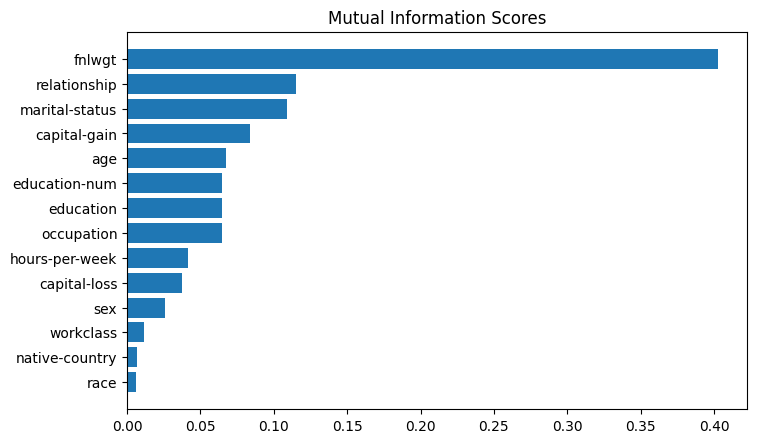

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

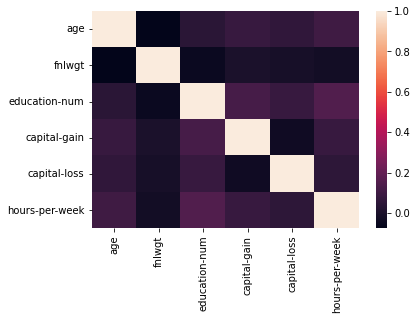

In [19]:
sns.heatmap(data=salary_df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


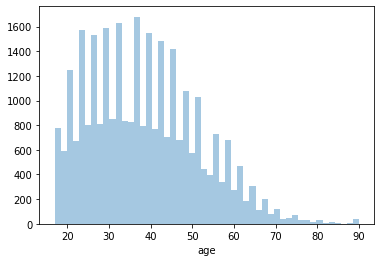

In [20]:
sns.distplot(salary_df["age"],kde=False)

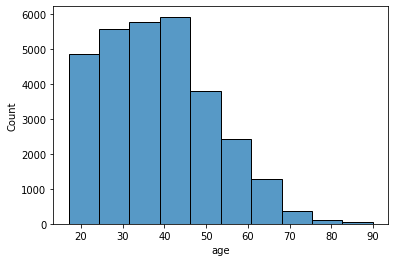

In [21]:
sns.histplot(x="age",data=salary_df,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


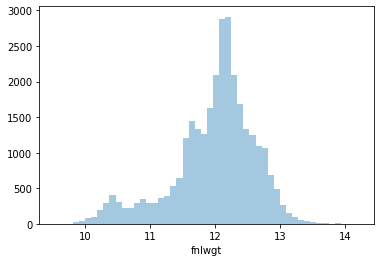

In [22]:
sns.distplot(salary_df["fnlwgt"].apply(np.log1p),kde=False)

The values of fnlwgt was in0.00... so to exapand we use np.log1p.

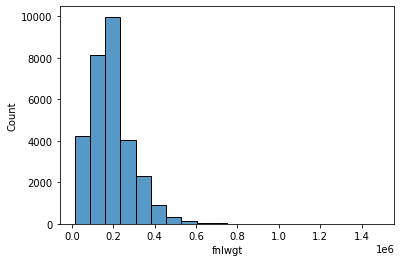

In [23]:
sns.histplot(x="fnlwgt",data=salary_df,bins=20)

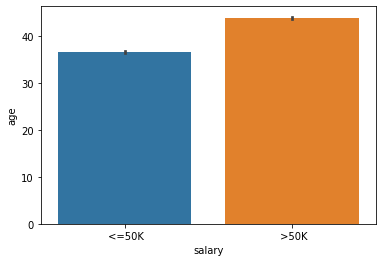

In [24]:
sns.barplot(y="age",x="salary",data=salary_df)

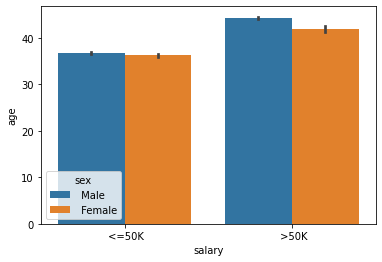

In [25]:
sns.barplot(y="age",x="salary",hue="sex",data=salary_df)

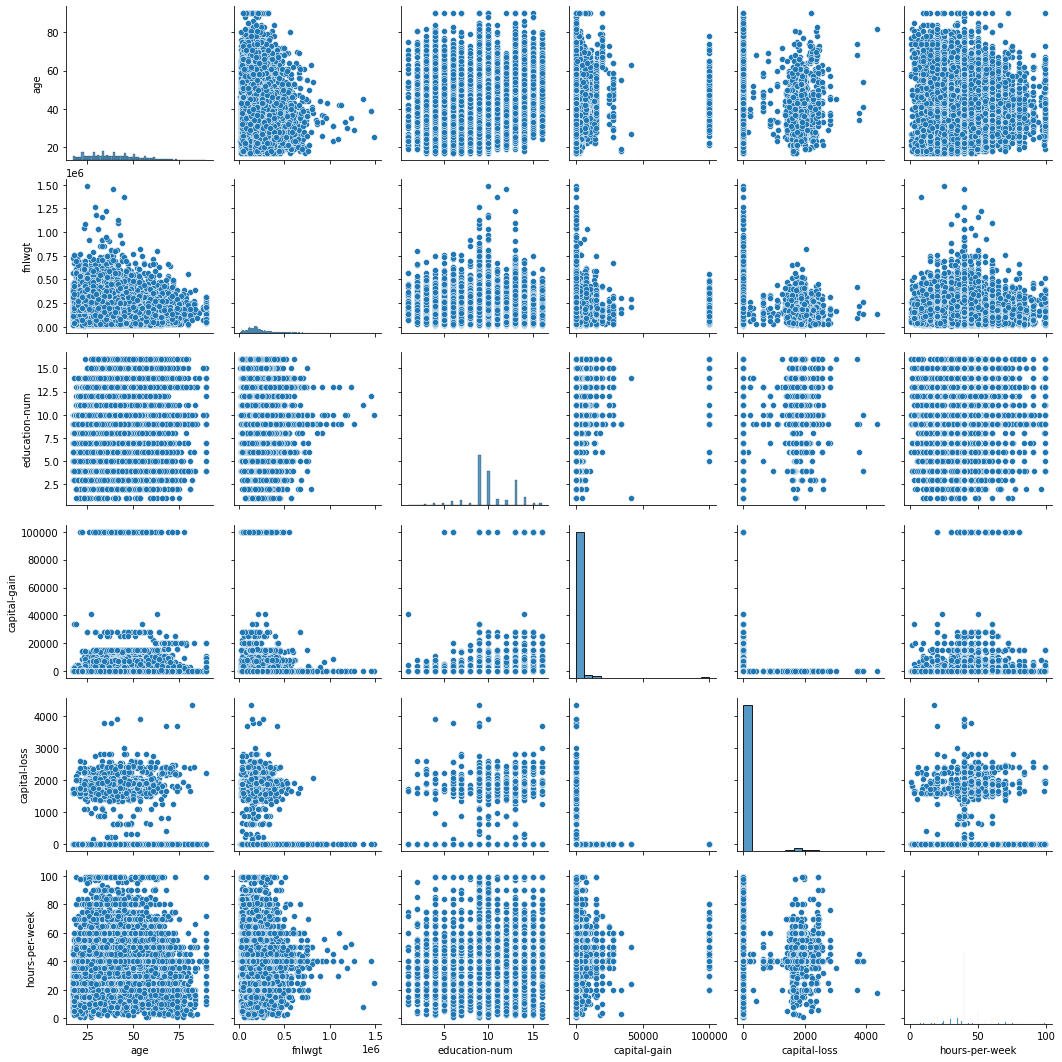

In [26]:
sns.pairplot(data=salary_df)

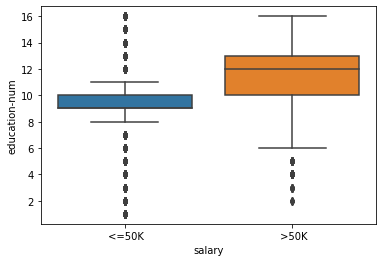

In [27]:
sns.boxplot(y="education-num",x="salary",data=salary_df)

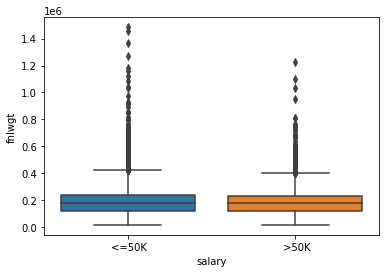

In [28]:
sns.boxplot(y="fnlwgt",x="salary",data=salary_df)

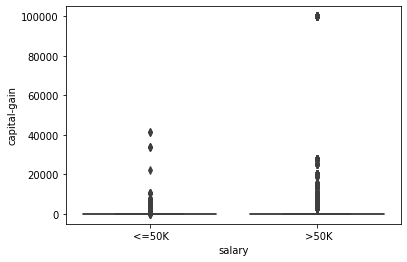

In [29]:
sns.boxplot(y="capital-gain",x="salary",data=salary_df)

In [30]:
salary_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

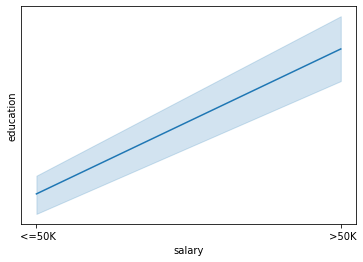

In [31]:
sns.lineplot(x="salary",y="education",data=salary_df)

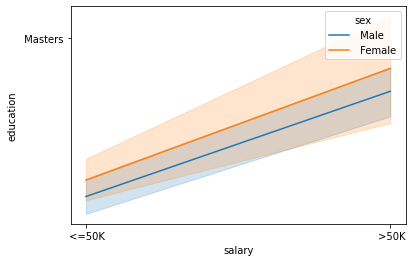

In [32]:
sns.lineplot(x="salary",y="education",hue="sex",data=salary_df)

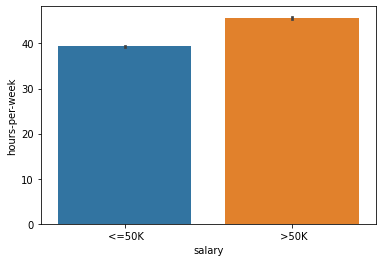

In [33]:
sns.barplot(y="hours-per-week",x="salary",data=salary_df)

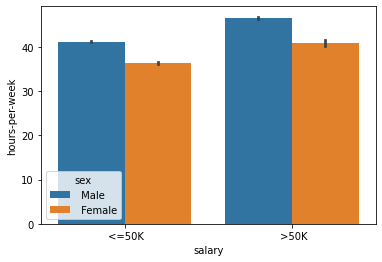

In [34]:
sns.barplot(y="hours-per-week",x="salary",hue="sex",data=salary_df)

In [35]:
salary_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
salary_df["workclass"]=le.fit_transform(salary_df["workclass"])
salary_df["education"]=le.fit_transform(salary_df["education"])
salary_df["marital-status"]=le.fit_transform(salary_df["marital-status"])
salary_df["occupation"]=le.fit_transform(salary_df["occupation"])
salary_df["relationship"]=le.fit_transform(salary_df["relationship"])
salary_df["race"]=le.fit_transform(salary_df["race"])
salary_df["sex"]=le.fit_transform(salary_df["sex"])
salary_df["native-country"]=le.fit_transform(salary_df["native-country"])
salary_df["salary"]=le.fit_transform(salary_df["salary"])

In [44]:
x= salary_df.drop("salary",axis=1)
y=salary_df["salary"]

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [52]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8514785837422093
